C:\Users\HARISH\AppData\Local\Temp\ipykernel_25076\564304304.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\HARISH\Downloads\archive\accident.csv", header=0, index_col=0, parse_dates=True)


Remaining columns after drop: Index(['Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')
      Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
Date                                                             
56    Female             27.0          No            No         1
69    Female             46.0          No           Yes         1
46      Male             46.0         Yes           Yes         0
32      Male            117.0          No           Yes         0
60    Female             40.0         Yes           Yes         0
Using column: Survival_Rate


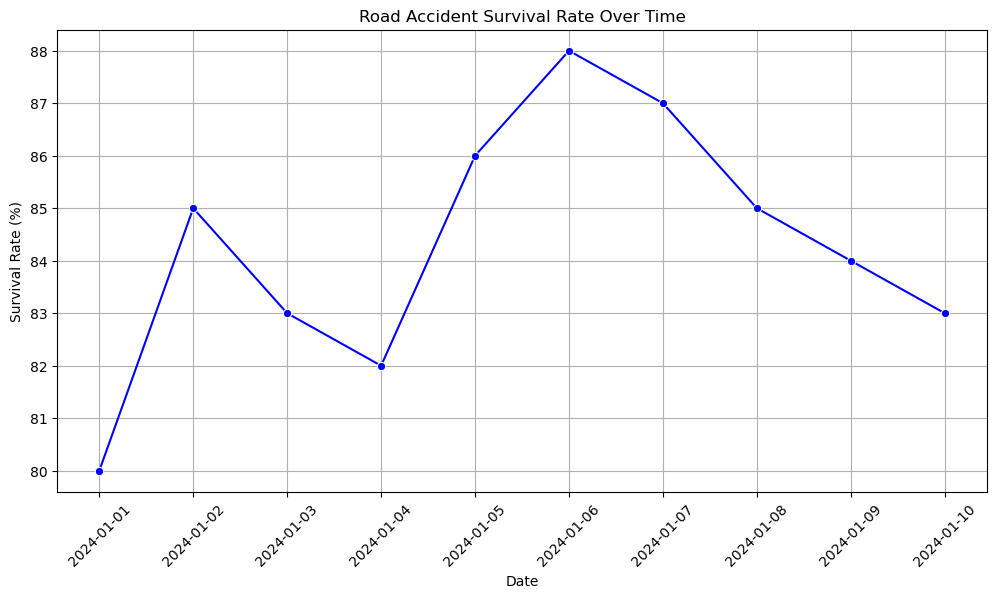

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\HARISH\Downloads\archive\accident.csv", header=0, index_col=0, parse_dates=True)
df.dropna(inplace=True)

# Copy DataFrame
Temp = df.copy()

# Drop unnecessary columns if they exist
columns_to_drop = [
    'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 
    'LandMaxTemperatureUncertainty', 'LandMinTemperature', 
    'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 
    'LandAndOceanAverageTemperatureUncertainty'
]
Temp.drop(columns=[col for col in columns_to_drop if col in Temp.columns], inplace=True)

# Rename the single remaining column to 'Temp' if applicable
if Temp.shape[1] == 1:
    Temp.columns = ['Temp']

Temp.index.name = "Date"
print("Remaining columns after drop:", Temp.columns)
print(Temp.head())

# Sample Road Accident Survival Data (replace with actual dataset)
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Survival_Rate': [80, 85, 83, 82, 86, 88, 87, 85, 84, 83]  # Example survival rates
}
df = pd.DataFrame(data).set_index('Date')

# Check for 'Survival' column dynamically
survival_col = next((col for col in df.columns if 'survival' in col.lower()), None)
if not survival_col:
    raise KeyError("No column related to 'Survival' found. Available columns:", df.columns)

print(f"Using column: {survival_col}")

# Plot survival rate variation
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df[survival_col], marker="o", color="b")
plt.title('Road Accident Survival Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
